In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 사이킷런이 제공하는 MNIST 손글씨 데이터를 불러오기 위해 import 한다.
from sklearn.datasets import load_digits
# kNN 분류기를 사용하기 위해서 import 한다.
from sklearn.neighbors import KNeighborsClassifier
# SVM 알고리즘을 사용하기 위해 import 한다. SVC => Support Vector Classification
from sklearn.svm import SVC
# 사이킷런의 의사결정 트리를 사용하기 위해 import 한다.
from sklearn.tree import DecisionTreeClassifier

손글씨 데이터를 불러온다.

In [3]:
mnist = load_digits() # 사이킷런이 제공하는 손글씨 데이터를 불러온다.
feature, label = mnist.data, mnist.target
print(feature.shape, label.shape)

(1797, 64) (1797,)


학습 데이터와 테스트 데이터를 나눈다.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, train_size=0.8)
print('학습 데이터 개수: {}, 테스트 데이터 개수: {}'.format(x_train.shape[0], x_test.shape[0]))

학습 데이터 개수: 1437, 테스트 데이터 개수: 360


단일 모델의 정확도 측정  
앙상블 정확도를 측정하기에 앞서서 단일 모델들의 정확도를 kNN, SVM, 의사결정 트리 분류기를 만들어서 정확도를 계산한다.

In [5]:
# kNN
knn = KNeighborsClassifier(n_neighbors=299).fit(x_train, y_train) # 모델 생성 및 학습
knn_predict = knn.predict(x_test) # 예측
knn_accuracy = accuracy_score(y_test, knn_predict) # 정확도
print('kNN 정확도: {:6.2%}'.format(knn_accuracy))

kNN 정확도: 85.56%


In [6]:
# svm
svm = SVC(C=0.1, gamma=0.003, probability=True).fit(x_train, y_train) # 모델 생성 및 학습
svm_predict = svm.predict(x_test) # 예측
svm_accuracy = accuracy_score(y_test, svm_predict) # 정확도
print('svm 정확도: {:6.2%}'.format(svm_accuracy))

svm 정확도: 87.50%


In [7]:
# 의사결정 트리
dt = DecisionTreeClassifier(max_depth=8, random_state=35).fit(x_train, y_train) # 모델 생성 및 학습
dt_predict = dt.predict(x_test) # 예측
dt_accuracy = accuracy_score(y_test, dt_predict) # 정확도
print('의사결정 트리 정확도: {:6.2%}'.format(dt_accuracy))

의사결정 트리 정확도: 86.94%


하드 보팅  
일반적인 투표와 같이 각 분류기의 예측값들을 모아 가장 많은 투표를 받은 예측값으로 최종 결론을 내린다.

In [8]:
# 하드/소프트 보팅을 계산하기 위해 import 한다.
from sklearn.ensemble import VotingClassifier

In [9]:
hv_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dt)], 
                          weights=[1, 1, 1], voting='hard').fit(x_train, y_train) # 모델 생성 및 학습
hv_predict = hv_clf.predict(x_test) # 예측
hv_accuracy = accuracy_score(y_test, hv_predict) # 정확도
print('하드 보팅 정확도: {:6.2%}'.format(hv_accuracy))

하드 보팅 정확도: 92.22%


소프트 보팅  
각 분류별 확률을 더해준 값을 점수로 사용해 최대 점수를 가진 분류값으로 결론을 내린다.

확률 합계

In [10]:
# predict_proba() 메소드로 분류 모델이 각 레이블의 확률을 계산한다.
knn_proba = knn.predict_proba(x_test)
# print(knn_proba)
print(knn_proba[0])
print('확률 합계: {:6.2%}'.format(knn_proba[0].sum()))

[0.03344482 0.         0.01003344 0.08695652 0.04682274 0.43478261
 0.00334448 0.07692308 0.16722408 0.14046823]
확률 합계: 100.00%


In [11]:
svm_proba = svm.predict_proba(x_test)
# print(svm_proba)
print(svm_proba[0])
print('확률 합계: {:6.2%}'.format(svm_proba[0].sum()))

[1.47656555e-03 1.52186775e-03 2.37788862e-03 9.62560016e-04
 1.50996180e-03 9.79347711e-01 8.36861801e-04 1.15590348e-03
 6.76447205e-03 4.04620778e-03]
확률 합계: 100.00%


In [12]:
dt_proba = dt.predict_proba(x_test)
# print(dt_proba)
print(dt_proba[0])
print('확률 합계: {:6.2%}'.format(dt_proba[0].sum()))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
확률 합계: 100.00%


In [13]:
sv_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dt)], 
                          weights=[1, 1, 1], voting='soft').fit(x_train, y_train) # 모델 생성 및 학습
sv_predict = sv_clf.predict(x_test) # 예측
sv_accuracy = accuracy_score(y_test, sv_predict) # 정확도
print('소프트 보팅 정확도: {:6.2%}'.format(sv_accuracy))

소프트 보팅 정확도: 90.56%


단일 모델과 앙상블 모델의 정확도 비교 시각화

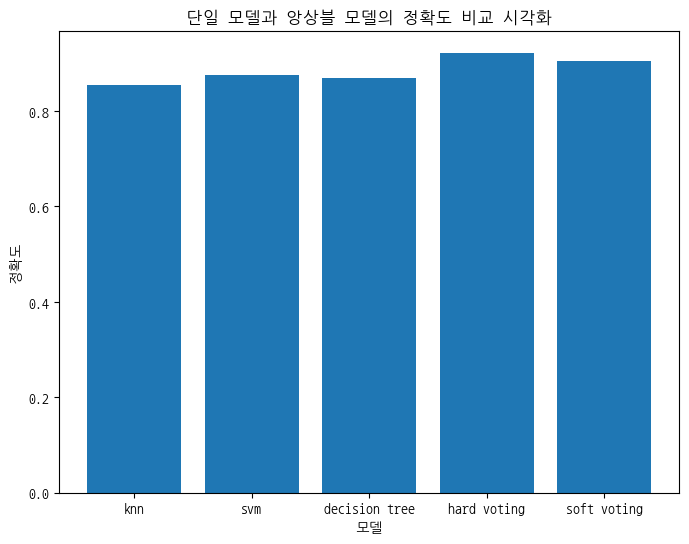

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(5), height=[
    accuracy_score(y_test, knn_predict),
    accuracy_score(y_test, svm_predict),
    accuracy_score(y_test, dt_predict),
    accuracy_score(y_test, hv_predict),
    accuracy_score(y_test, sv_predict)
])
plt.xticks(x, ['knn', 'svm', 'decision tree', 'hard voting', 'soft voting'])
plt.title('단일 모델과 앙상블 모델의 정확도 비교 시각화')
plt.xlabel('모델')
plt.ylabel('정확도')
plt.show()